In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('data/정글.csv')
df.drop('Unnamed: 0',1,inplace=True)
df.head(2)

C:\Users\ice_9\AppData\Local\Temp\ipykernel_25488\869063719.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop('Unnamed: 0',1,inplace=True)


,win,분당 킬,분당 어시,분당 데스,퍼블유무,퍼블어시유무,분당 얻은 골드,분당 피해량,분당 cc건시간,분당 CS,분당 죽은시간,분당 시야점수
0,True,0.14,0.69,0.14,False,True,382.95,570.17,0.80,1.0,2.97,0.76
1,False,0.18,0.18,0.33,False,False,331.90,510.93,0.47,1.0,10.07,0.62


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(df.drop('win',1),df['win'], random_state=0)

scaler = MinMaxScaler()
scaler.fit(X_train)  #train꺼로 transform한걸로 fit 중요!!!!
X_train_temp = scaler.transform(X_train)
X_test_temp = scaler.transform(X_test)
X_train = pd.DataFrame(X_train_temp, columns=X_train.columns, index=list(X_train.index.values))
X_test = pd.DataFrame(X_test_temp, columns=X_test.columns, index=list(X_test.index.values))

C:\Users\ice_9\AppData\Local\Temp\ipykernel_25488\2179540545.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train, X_test, y_train, y_test = train_test_split(df.drop('win',1),df['win'], random_state=0)


1.0 0.747
0.875 0.755
0.882 0.786
0.856 0.783
0.858 0.795
0.846 0.798
0.845 0.803
0.839 0.804
0.841 0.81
0.882 0.786


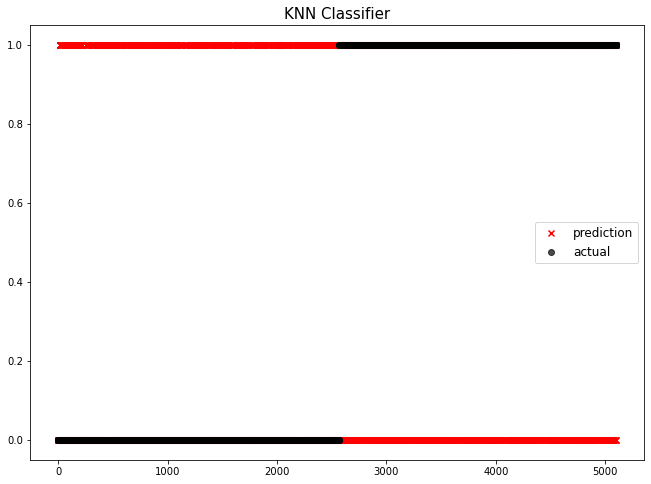

            model        f1
0  KNN Classifier  0.780918


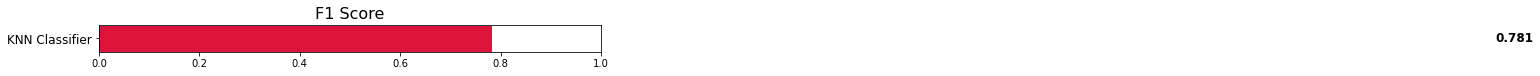

In [3]:
### 모델링 (random_state=0)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score

my_predictions = {}
my_pred = None
my_actual = None
my_name = None

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(11, 8))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def f1_eval(name_, pred, actual):
    global my_predictions, colors, my_pred, my_actual, my_name
    
    my_name = name_
    my_pred = pred
    my_actual = actual

    plot_predictions(name_, pred, actual)

    f1 = f1_score(actual, pred)
    my_predictions[name_] = f1

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'f1'])
    print(df)
    min_ = 0
    max_ = 1
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['f1'], height=0.3)
    
    for i, v in enumerate(df['f1']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('F1 Score', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()
    
def add_model(name_, pred, actual):
    global my_predictions, my_pred, my_actual, my_name
    my_name = name_
    my_pred = pred
    my_actual = actual
    
    f1 = f1_score(actual, pred)
    my_predictions[name_] = f1

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

def plot_all():
    global my_predictions, my_pred, my_actual, my_name
    
    plot_predictions(my_name, my_pred, my_actual)
    
    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'f1'])
    print(df)
    min_ = 0
    max_ = 1
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['f1'], height=0.3)
    
    for i, v in enumerate(df['f1']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('F1 Score', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
#### knn 파라미터 찾기
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    print(knn.score(X_train, y_train).round(3), knn.score(X_test, y_test).round(3))
    # f1_eval(f'KNN Classifier {i}', pred, y_test)
#### 머신러닝 모델 돌려보기
#### hyperparameter 튜닝 전
# KNN classifier (K=3)
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(knn.score(X_train, y_train).round(3), knn.score(X_test, y_test).round(3))
f1_eval('KNN Classifier', pred, y_test)

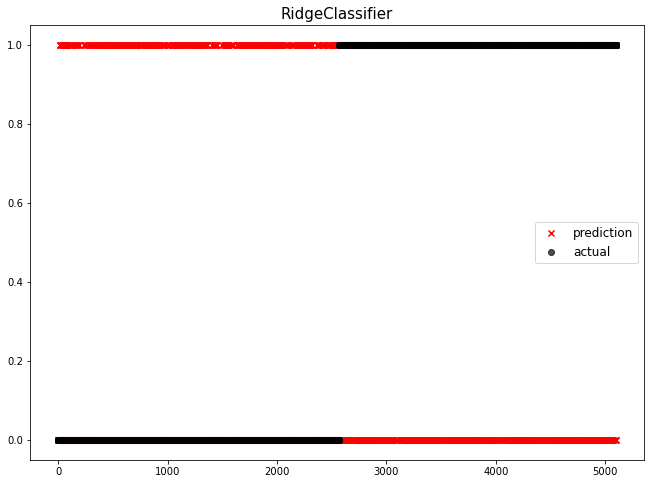

             model        f1
0  RidgeClassifier  0.829327
1   KNN Classifier  0.780918


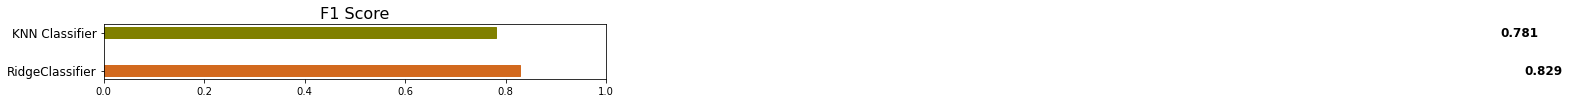

In [4]:
# RidgeCalssifier (alpha=1)
from sklearn.linear_model import RidgeClassifier

ridge = RidgeClassifier(alpha=1)
ridge.fit(X_train, y_train)
pred = ridge.predict(X_test)
f1_eval('RidgeClassifier', pred, y_test)

0.823 0.831


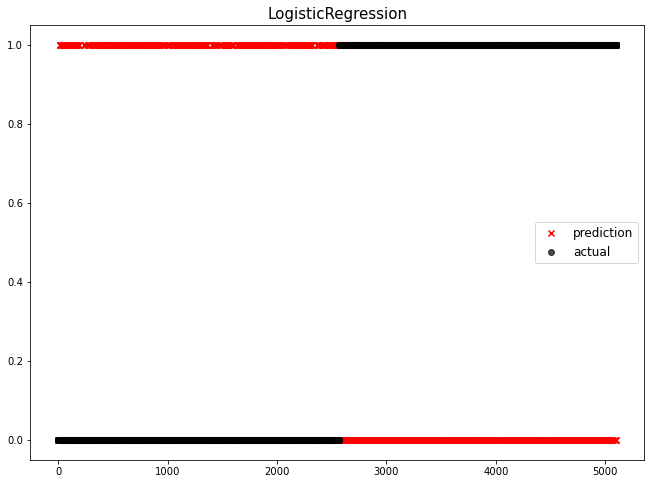

                model        f1
0     RidgeClassifier  0.829327
1  LogisticRegression  0.828000
2      KNN Classifier  0.780918


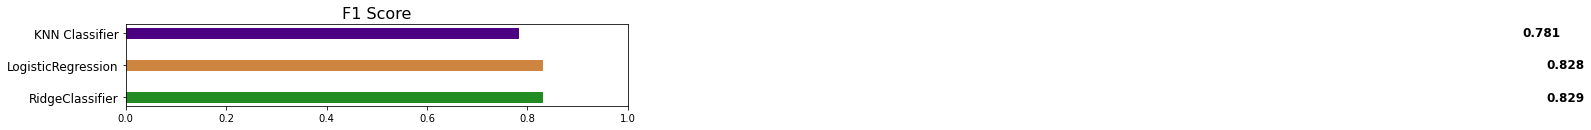

In [5]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(random_state=0)
lg.fit(X_train, y_train)
pred = lg.predict(X_test)
print(lg.score(X_train, y_train).round(3), lg.score(X_test, y_test).round(3))
f1_eval('LogisticRegression', pred, y_test)

0.796 0.794


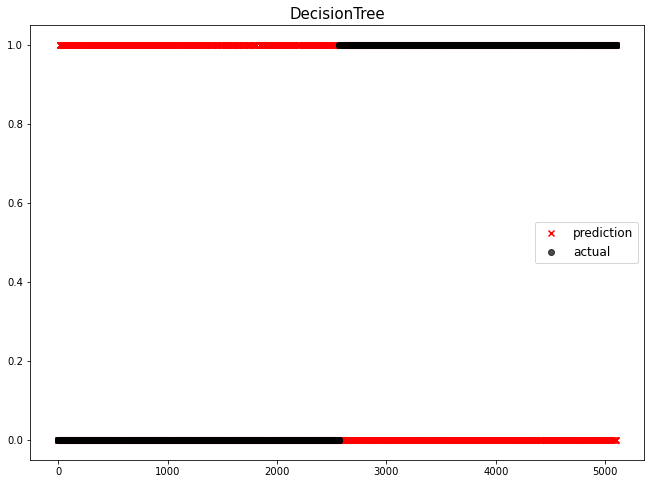

                model        f1
0     RidgeClassifier  0.829327
1  LogisticRegression  0.828000
2        DecisionTree  0.790084
3      KNN Classifier  0.780918


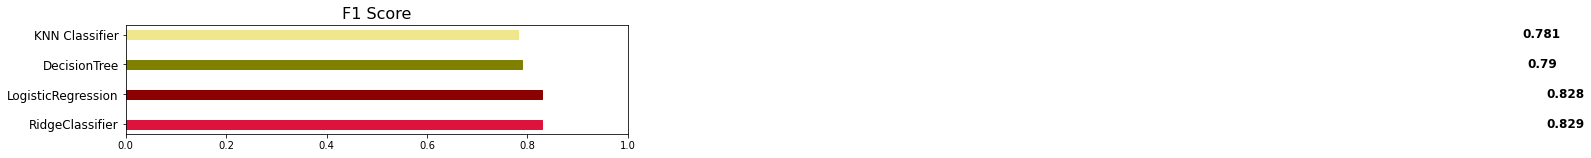

In [6]:
# DecisionTree (max_depth = 5, max_features=0.8)
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0,max_depth = 5, max_features=0.8)
tree.fit(X_train, y_train)
pred = tree.predict(X_test)
print(tree.score(X_train, y_train).round(3), tree.score(X_test, y_test).round(3))
f1_eval('DecisionTree', pred, y_test)

0.816 0.812


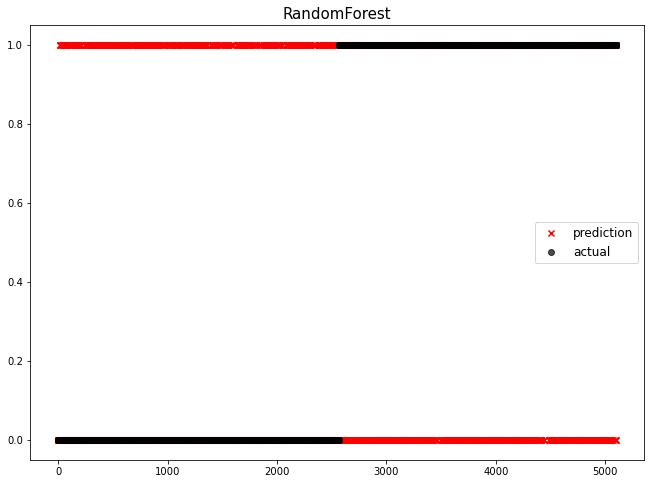

                model        f1
0     RidgeClassifier  0.829327
1  LogisticRegression  0.828000
2        RandomForest  0.807010
3        DecisionTree  0.790084
4      KNN Classifier  0.780918


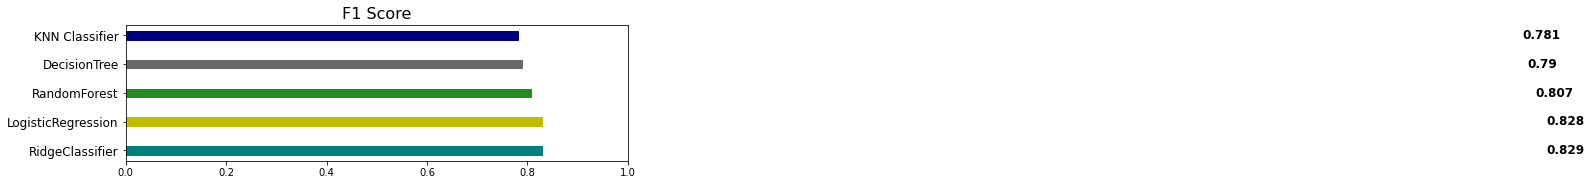

In [7]:
#RF (max_depth = 5)
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state = 0, max_depth = 5)
forest.fit(X_train, y_train)
pred = forest.predict(X_test)
print(forest.score(X_train, y_train).round(3), forest.score(X_test, y_test).round(3))
f1_eval('RandomForest', pred, y_test)

0.926 0.816


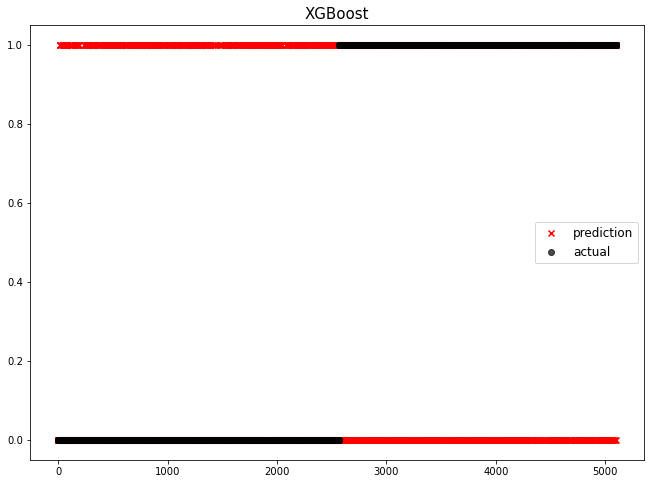

                model        f1
0     RidgeClassifier  0.829327
1  LogisticRegression  0.828000
2             XGBoost  0.811973
3        RandomForest  0.807010
4        DecisionTree  0.790084
5      KNN Classifier  0.780918


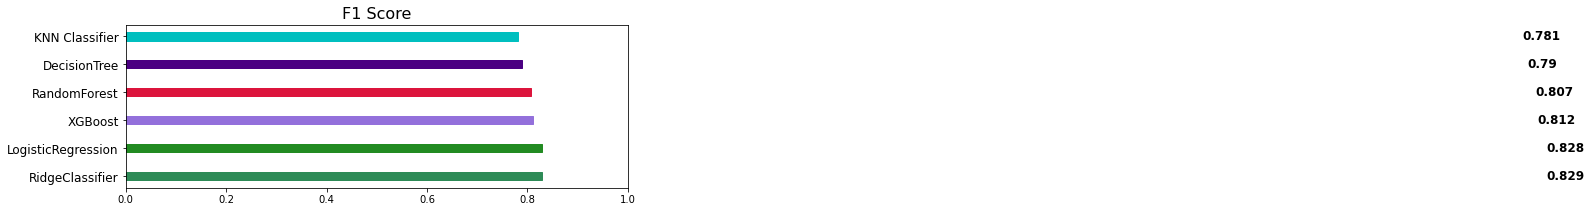

In [8]:
# XGBoost
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state = 0)
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
print(xgb.score(X_train, y_train).round(3), xgb.score(X_test, y_test).round(3))
f1_eval('XGBoost', pred, y_test)

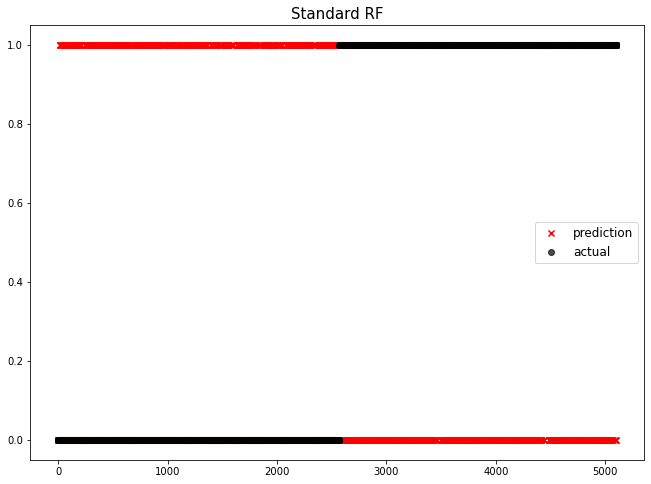

                model        f1
0     RidgeClassifier  0.829327
1  LogisticRegression  0.828000
2             XGBoost  0.811973
3        RandomForest  0.807010
4         Standard RF  0.807010
5        DecisionTree  0.790084
6      KNN Classifier  0.780918


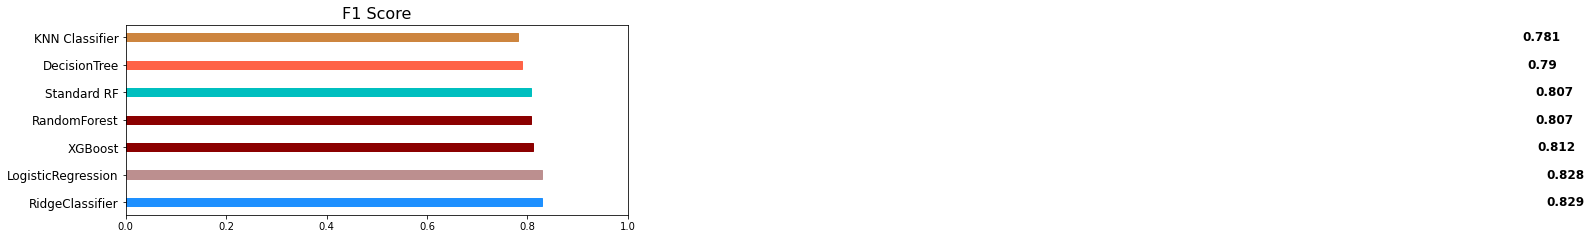

In [9]:
RF_pipeline = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(random_state = 0, max_depth = 5)
)
RF_pipeline.fit(X_train, y_train)
pred = RF_pipeline.predict(X_test)
f1_eval('Standard RF', pred, y_test)

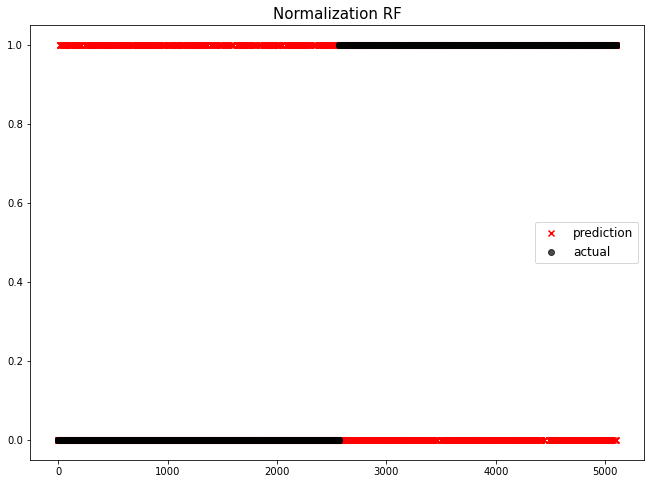

                model        f1
0     RidgeClassifier  0.829327
1  LogisticRegression  0.828000
2             XGBoost  0.811973
3        RandomForest  0.807010
4         Standard RF  0.807010
5    Normalization RF  0.807010
6        DecisionTree  0.790084
7      KNN Classifier  0.780918


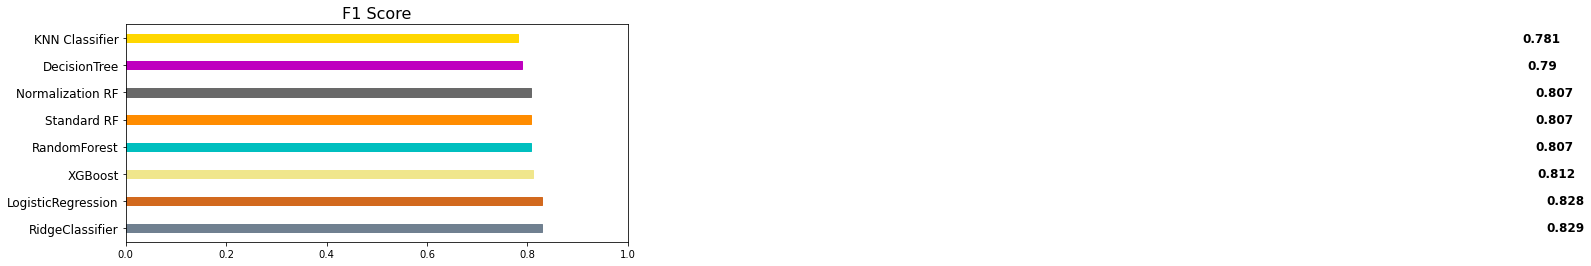

In [10]:
RF_pipeline = make_pipeline(
    MinMaxScaler(),
    RandomForestClassifier(random_state = 0, max_depth = 5)
)
RF_pipeline.fit(X_train, y_train)
pred = RF_pipeline.predict(X_test)
f1_eval('Normalization RF', pred, y_test)

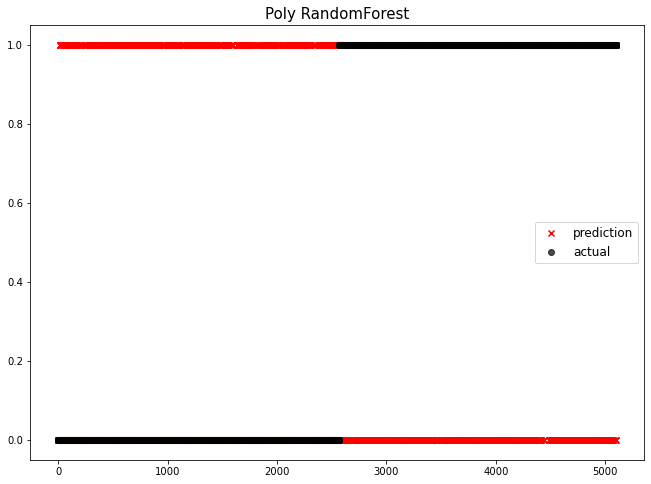

                model        f1
0     RidgeClassifier  0.829327
1  LogisticRegression  0.828000
2             XGBoost  0.811973
3   Poly RandomForest  0.808519
4        RandomForest  0.807010
5         Standard RF  0.807010
6    Normalization RF  0.807010
7        DecisionTree  0.790084
8      KNN Classifier  0.780918


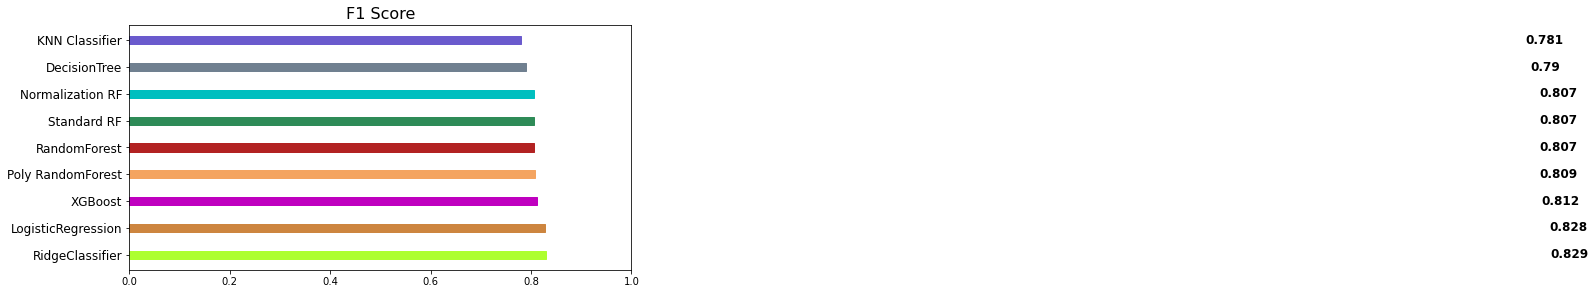

In [11]:
poly_RF_pipeline = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2, include_bias=False),
    RandomForestClassifier(random_state = 0, max_depth = 5)
)
poly_RF_pipeline.fit(X_train, y_train)
poly_pred = poly_RF_pipeline.predict(X_test)
f1_eval('Poly RandomForest', poly_pred, y_test)

In [12]:
from sklearn.ensemble import VotingClassifier

models = [
    ('Logi', LogisticRegression()), 
    # ('ridge', RidgeClassifier()),
    # ('knn', KNeighborsClassifier()),
    # ('tree', DecisionTreeClassifier()),
    ('ranfore', RandomForestClassifier()),
    ('xgb', XGBClassifier())
]

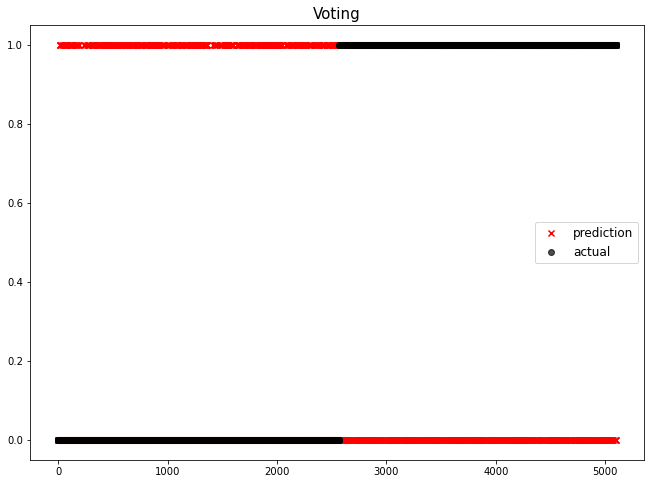

                model        f1
0     RidgeClassifier  0.829327
1  LogisticRegression  0.828000
2              Voting  0.825499
3             XGBoost  0.811973
4   Poly RandomForest  0.808519
5        RandomForest  0.807010
6         Standard RF  0.807010
7    Normalization RF  0.807010
8        DecisionTree  0.790084
9      KNN Classifier  0.780918


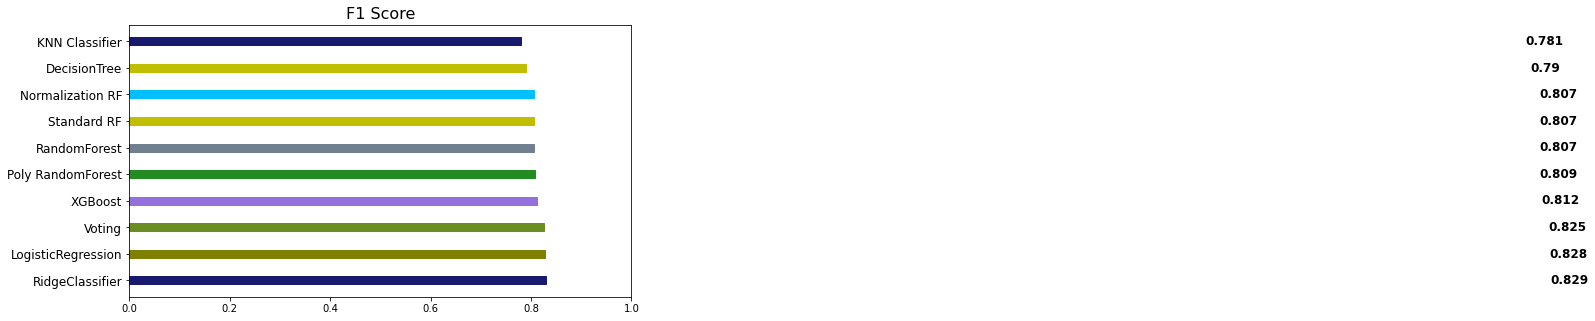

In [13]:
vc = VotingClassifier(models, voting='soft', n_jobs=-1)
vc.fit(X_train, y_train)
pred = vc.predict(X_test)
f1_eval('Voting', pred, y_test)

In [14]:
models = [
    ('Logi', LogisticRegression()), 
    # ('ridge', RidgeClassifier()),
    # ('knn', KNeighborsClassifier()),
    # ('tree', DecisionTreeClassifier()),
    ('ranfore', RF_pipeline),
    ('xgb', XGBClassifier())
]

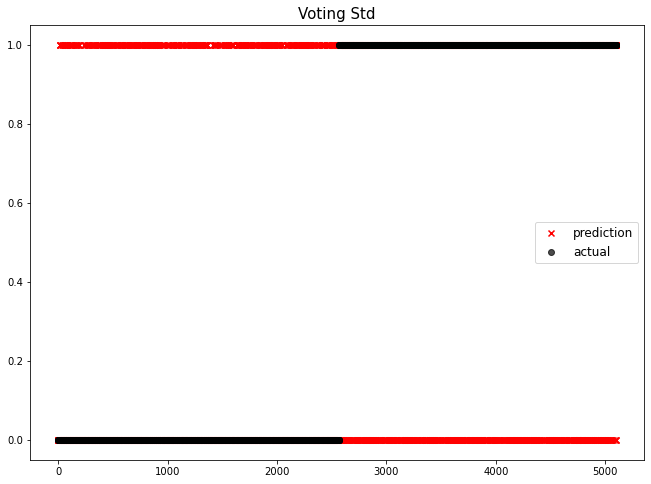

                 model        f1
0      RidgeClassifier  0.829327
1   LogisticRegression  0.828000
2               Voting  0.825499
3           Voting Std  0.823908
4              XGBoost  0.811973
5    Poly RandomForest  0.808519
6         RandomForest  0.807010
7          Standard RF  0.807010
8     Normalization RF  0.807010
9         DecisionTree  0.790084
10      KNN Classifier  0.780918


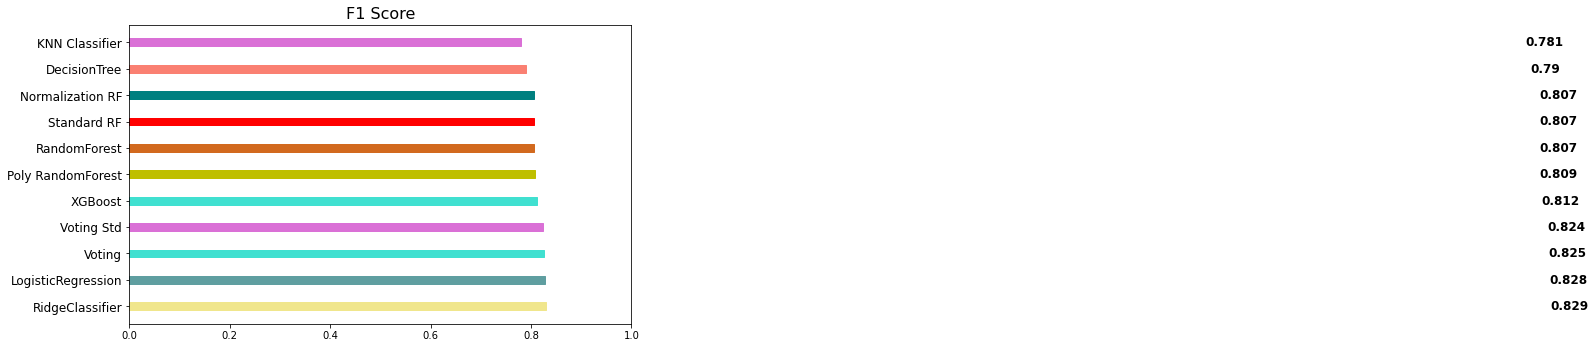

In [15]:
vc = VotingClassifier(models, voting='soft', n_jobs=-1)
vc.fit(X_train, y_train)
pred = vc.predict(X_test)
f1_eval('Voting Std', pred, y_test)

In [16]:
from sklearn.ensemble import StackingClassifier

stack_models = [
    ('randomforest', forest), 
    ('logistic', lg),
]

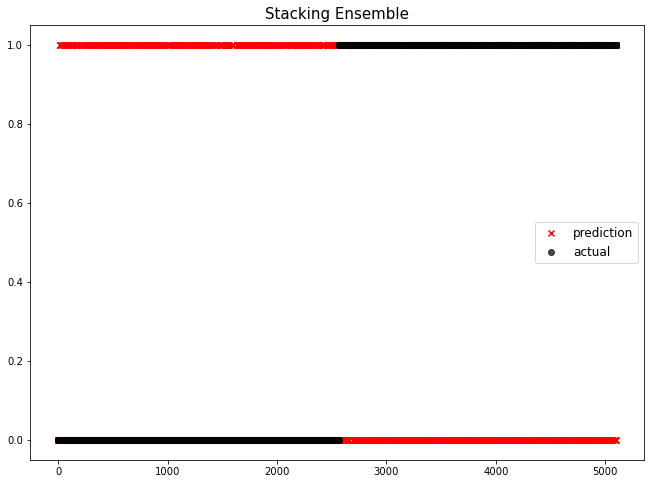

                 model        f1
0      RidgeClassifier  0.829327
1   LogisticRegression  0.828000
2               Voting  0.825499
3           Voting Std  0.823908
4    Stacking Ensemble  0.823813
5              XGBoost  0.811973
6    Poly RandomForest  0.808519
7         RandomForest  0.807010
8          Standard RF  0.807010
9     Normalization RF  0.807010
10        DecisionTree  0.790084
11      KNN Classifier  0.780918


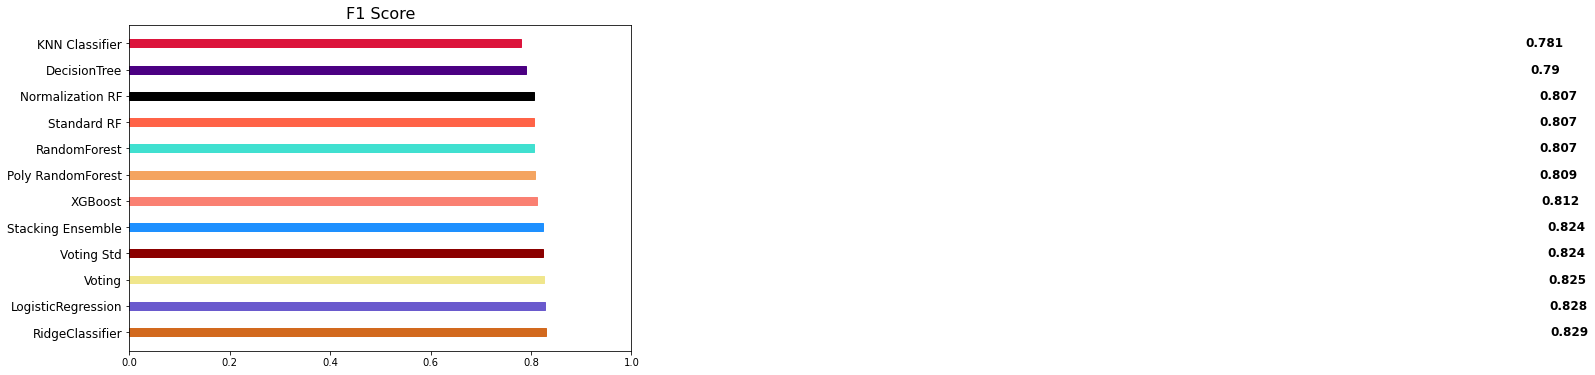

In [17]:
stack_cls = StackingClassifier(stack_models, final_estimator=xgb, n_jobs=-1)

# 샘플 데이터, 알고리즘 3개만 사용했지만 시간이 많이 걸림을 확인 가능
stack_cls.fit(X_train, y_train)
stack_pred = stack_cls.predict(X_test)
f1_eval('Stacking Ensemble', stack_pred, y_test)

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from lightgbm import LGBMClassifier

In [19]:
from sklearn.ensemble import VotingClassifier

In [20]:
rf_best = make_pipeline(
    # StandardScaler(),
    RandomForestClassifier(max_depth=10, max_features= 0.7, min_samples_split= 5,
 n_estimators= 100, random_state= 0),
)

In [21]:
xgb_best = make_pipeline(
    XGBClassifier(learning_rate= 0.1, max_depth= 5, n_estimators= 200,
 random_state= 0, subsample= 0.7),
)


In [22]:
lgbm_best = make_pipeline(
    StandardScaler(),
    LGBMClassifier(colsample_bytree= 0.8, learning_rate= 0.01,
 max_depth= 5, n_estimators= 2000, random_state= 0,
 subsample= 0.7),
)

In [23]:
lgbm_best = LGBMClassifier(colsample_bytree= 0.8, learning_rate= 0.01,
 max_depth= 5, n_estimators= 2000, random_state= 0,
 subsample= 0.7)

In [24]:
knn_best = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=3),
)

In [25]:
lg_best = make_pipeline(
    # StandardScaler(),
    LogisticRegression(),
)

In [26]:
Ridge_best = make_pipeline(
    # StandardScaler(),
    RidgeClassifier(alpha=3),
)

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

In [28]:
gd_best = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(learning_rate= 0.1, max_depth= 6, max_features= 0.9,
 n_estimators= 200, random_state= 0, subsample= 0.7),
)

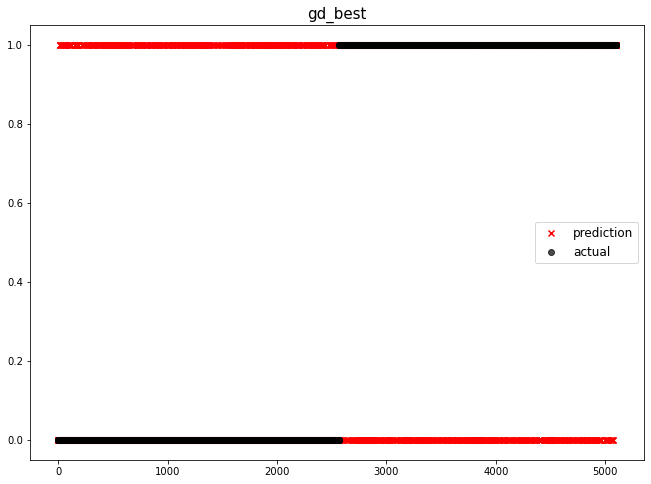

                 model        f1
0              gd_best  0.863394
1           Voting Std  0.861166
2               Voting  0.861100
3      RidgeClassifier  0.857492
4              XGBoost  0.856804
5    Stacking Ensemble  0.843855
6         RandomForest  0.840293
7          Standard RF  0.840293
8     Normalization RF  0.840293
9         DecisionTree  0.833029
10   Poly RandomForest  0.832511
11  LogisticRegression  0.831072
12      KNN Classifier  0.657422


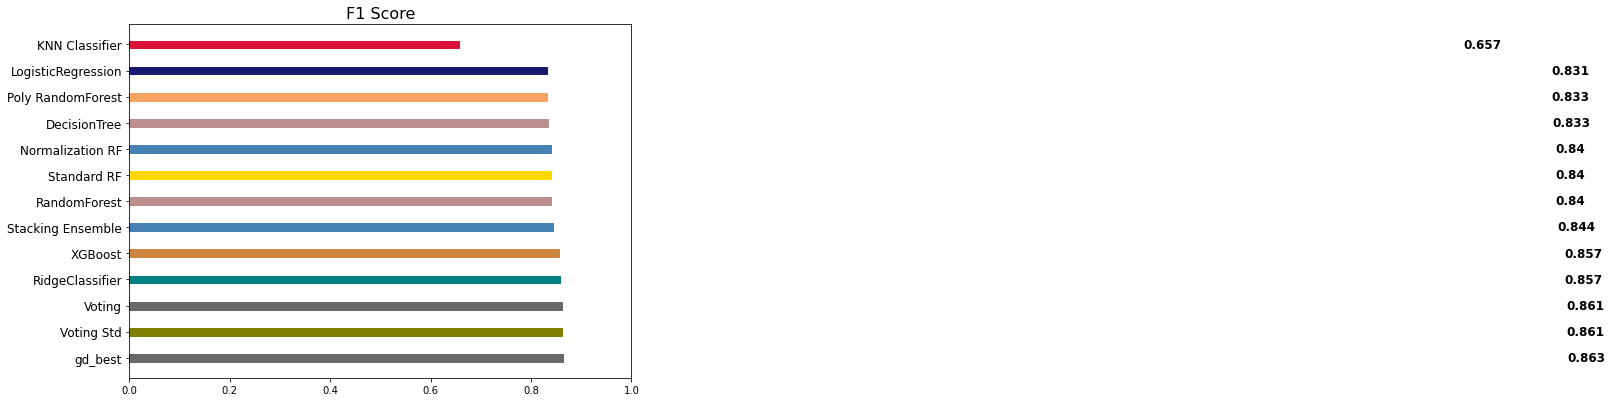

In [29]:
gd_best.fit(X_train, y_train)
gd_best_pred = gd_best.predict(X_test)
f1_eval('gd_best', gd_best_pred, y_test)

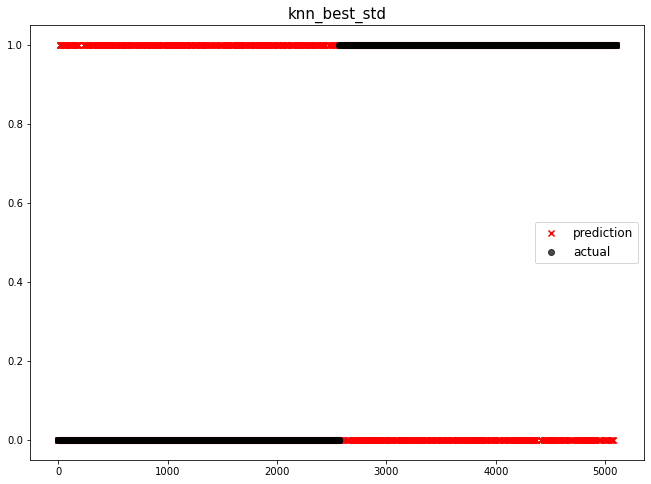

                 model        f1
0              gd_best  0.863394
1           Voting Std  0.861166
2         knn_best_std  0.861166
3               Voting  0.861100
4      RidgeClassifier  0.857492
5              XGBoost  0.856804
6    Stacking Ensemble  0.843855
7         RandomForest  0.840293
8          Standard RF  0.840293
9     Normalization RF  0.840293
10        DecisionTree  0.833029
11   Poly RandomForest  0.832511
12  LogisticRegression  0.831072
13      KNN Classifier  0.657422


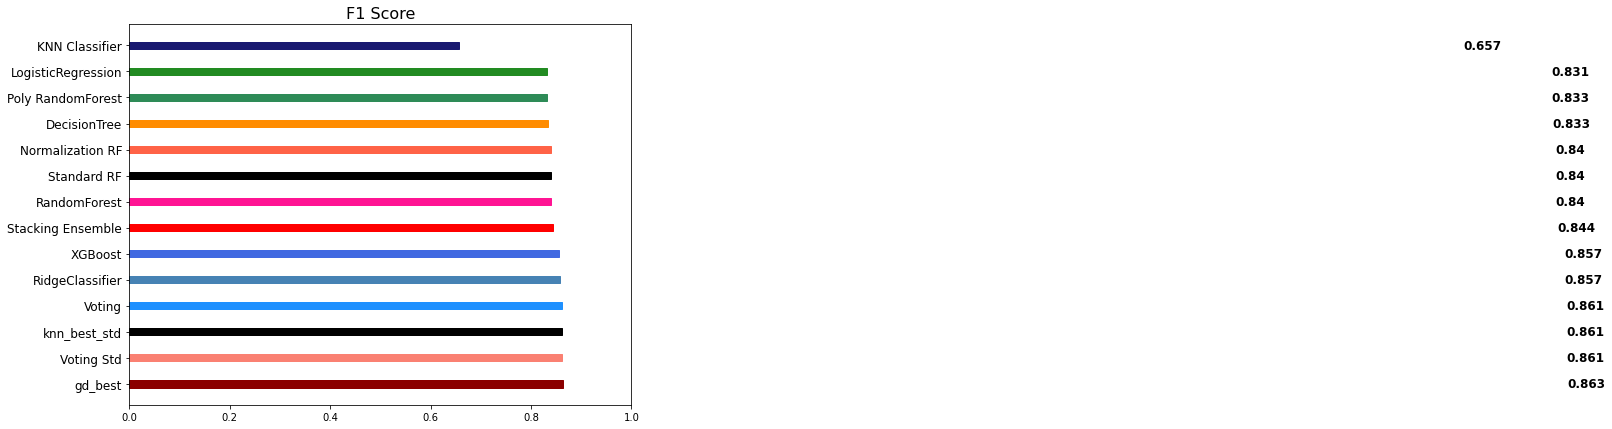

In [30]:
knn_best.fit(X_train, y_train)
knn_best_pred = knn_best.predict(X_test)
f1_eval('knn_best_std', pred, y_test)

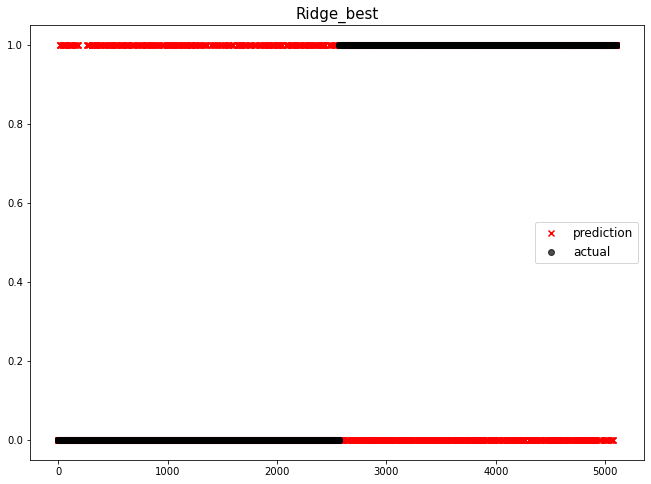

                 model        f1
0              gd_best  0.863394
1           Voting Std  0.861166
2         knn_best_std  0.861166
3               Voting  0.861100
4           Ridge_best  0.857551
5      RidgeClassifier  0.857492
6              XGBoost  0.856804
7    Stacking Ensemble  0.843855
8         RandomForest  0.840293
9          Standard RF  0.840293
10    Normalization RF  0.840293
11        DecisionTree  0.833029
12   Poly RandomForest  0.832511
13  LogisticRegression  0.831072
14      KNN Classifier  0.657422


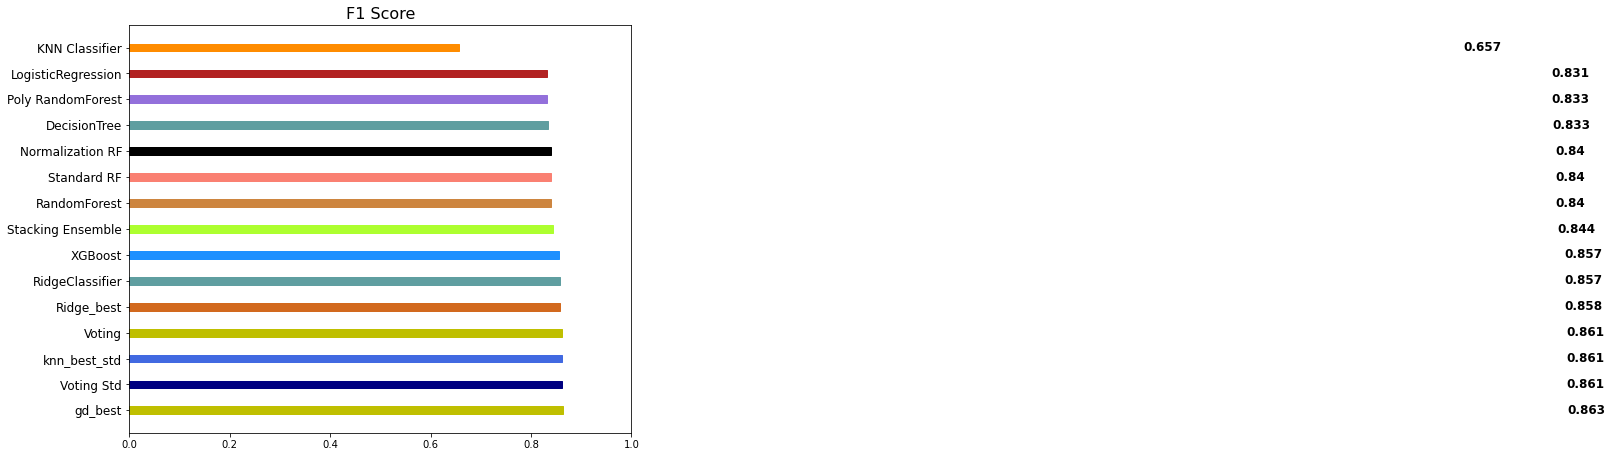

In [31]:
Ridge_best.fit(X_train, y_train)
Ridge_best_pred = Ridge_best.predict(X_test)
f1_eval('Ridge_best', Ridge_best_pred, y_test)

c:\Users\ice_9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


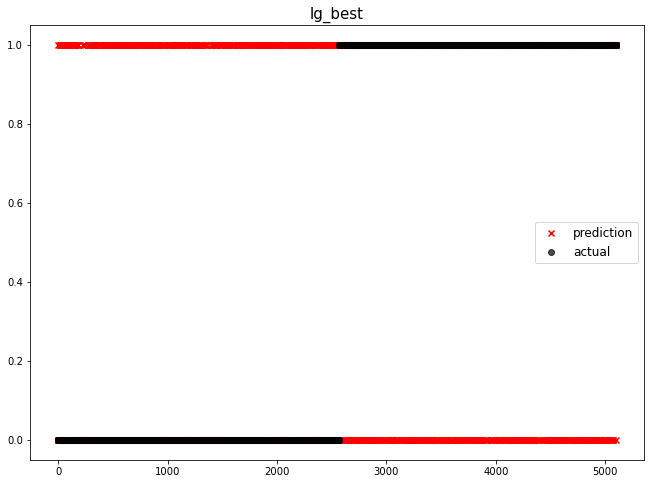

                 model        f1
0              gd_best  0.863394
1           Voting Std  0.861166
2         knn_best_std  0.861166
3               Voting  0.861100
4           Ridge_best  0.857551
5      RidgeClassifier  0.857492
6              XGBoost  0.856804
7    Stacking Ensemble  0.843855
8         RandomForest  0.840293
9          Standard RF  0.840293
10    Normalization RF  0.840293
11        DecisionTree  0.833029
12   Poly RandomForest  0.832511
13  LogisticRegression  0.831072
14             lg_best  0.831072
15      KNN Classifier  0.657422


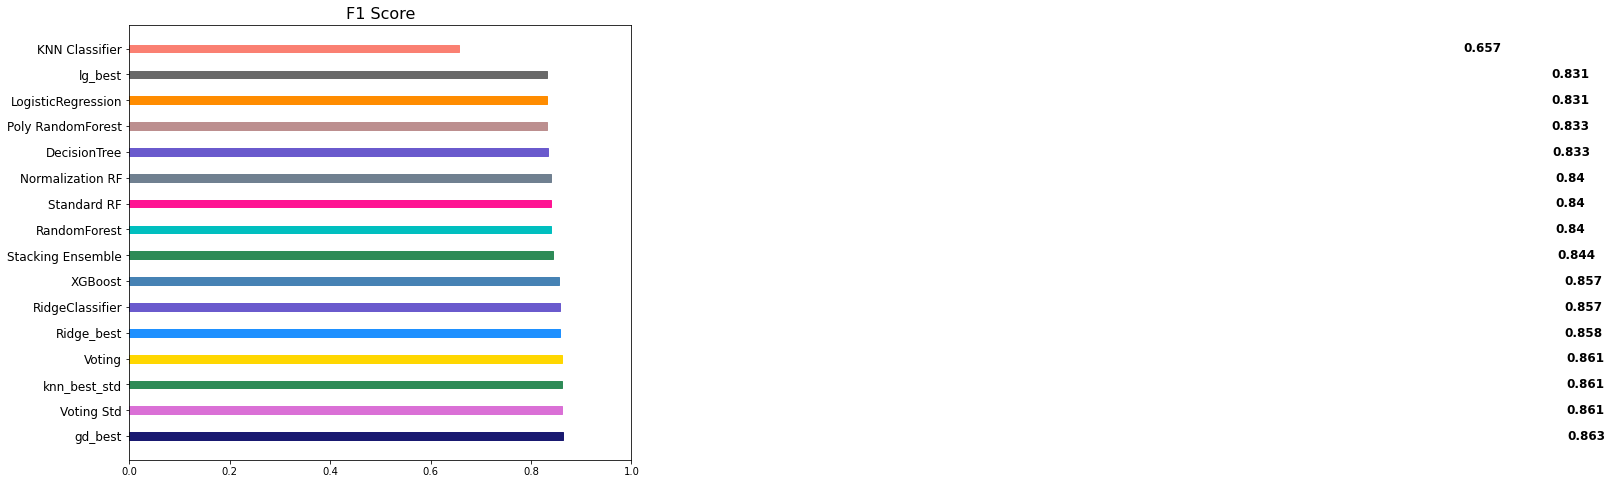

In [32]:
lg_best.fit(X_train, y_train)
lg_best_pred = lg_best.predict(X_test)
f1_eval('lg_best', lg_best_pred, y_test)

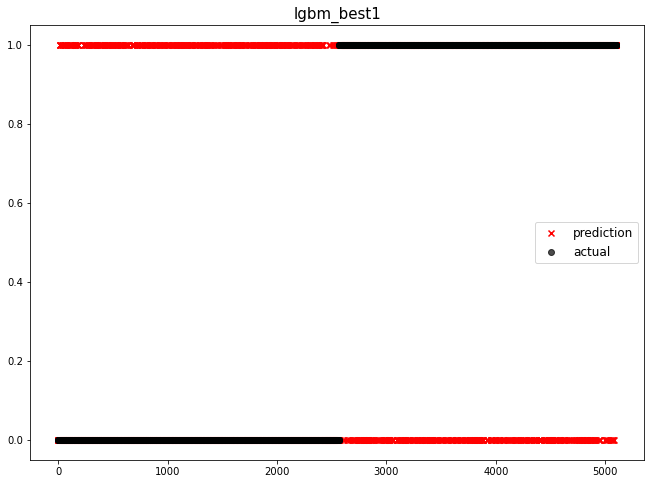

                 model        f1
0           lgbm_best1  0.865142
1              gd_best  0.863394
2           Voting Std  0.861166
3         knn_best_std  0.861166
4               Voting  0.861100
5           Ridge_best  0.857551
6      RidgeClassifier  0.857492
7              XGBoost  0.856804
8    Stacking Ensemble  0.843855
9         RandomForest  0.840293
10         Standard RF  0.840293
11    Normalization RF  0.840293
12        DecisionTree  0.833029
13   Poly RandomForest  0.832511
14  LogisticRegression  0.831072
15             lg_best  0.831072
16      KNN Classifier  0.657422


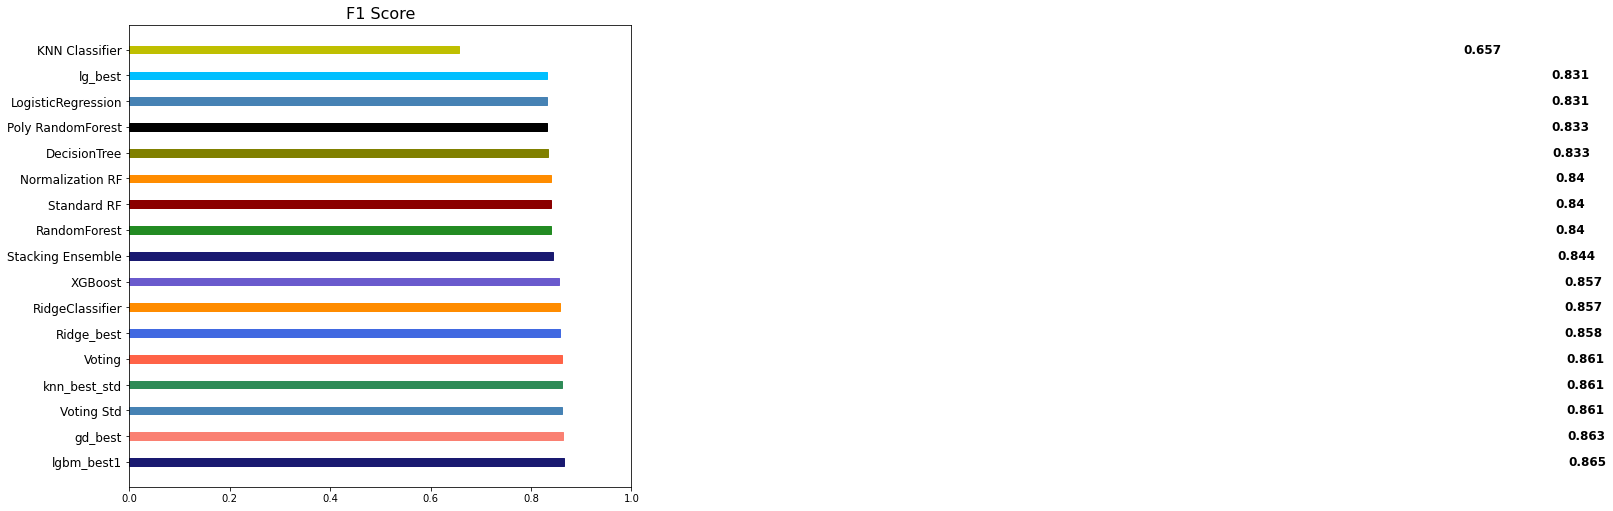

In [33]:
lgbm_best.fit(X_train, y_train)
lgbm_best_pred = lgbm_best.predict(X_test)
f1_eval('lgbm_best1', lgbm_best_pred, y_test)

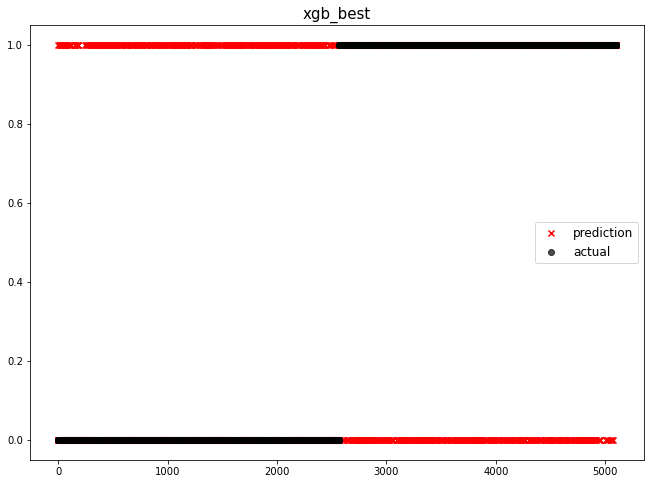

                 model        f1
0           lgbm_best1  0.865142
1             xgb_best  0.864032
2              gd_best  0.863394
3           Voting Std  0.861166
4         knn_best_std  0.861166
5               Voting  0.861100
6           Ridge_best  0.857551
7      RidgeClassifier  0.857492
8              XGBoost  0.856804
9    Stacking Ensemble  0.843855
10        RandomForest  0.840293
11         Standard RF  0.840293
12    Normalization RF  0.840293
13        DecisionTree  0.833029
14   Poly RandomForest  0.832511
15  LogisticRegression  0.831072
16             lg_best  0.831072
17      KNN Classifier  0.657422


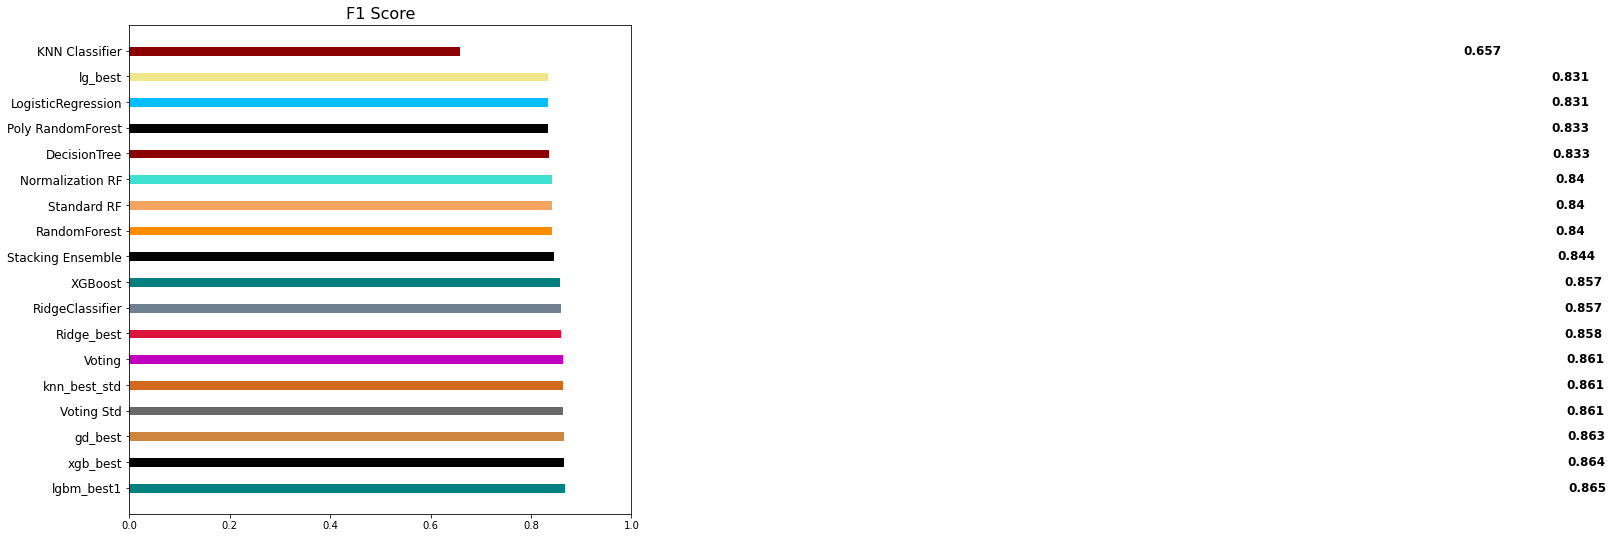

In [34]:
xgb_best.fit(X_train, y_train)
xgb_best_pred = xgb_best.predict(X_test)
f1_eval('xgb_best', xgb_best_pred, y_test)

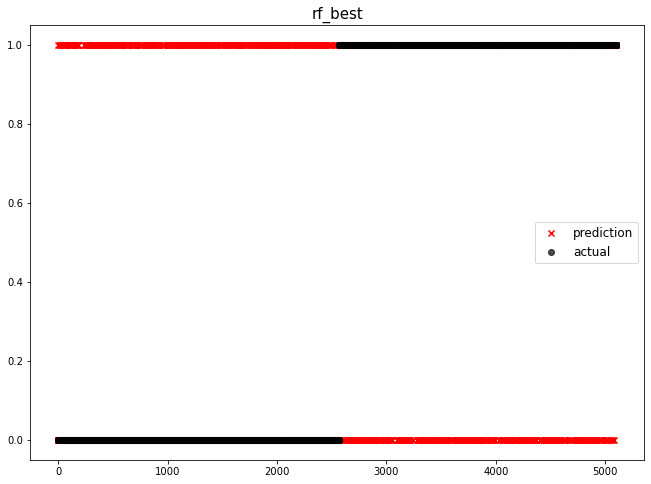

                 model        f1
0           lgbm_best1  0.865142
1             xgb_best  0.864032
2              gd_best  0.863394
3           Voting Std  0.861166
4         knn_best_std  0.861166
5               Voting  0.861100
6              rf_best  0.858496
7           Ridge_best  0.857551
8      RidgeClassifier  0.857492
9              XGBoost  0.856804
10   Stacking Ensemble  0.843855
11        RandomForest  0.840293
12         Standard RF  0.840293
13    Normalization RF  0.840293
14        DecisionTree  0.833029
15   Poly RandomForest  0.832511
16  LogisticRegression  0.831072
17             lg_best  0.831072
18      KNN Classifier  0.657422


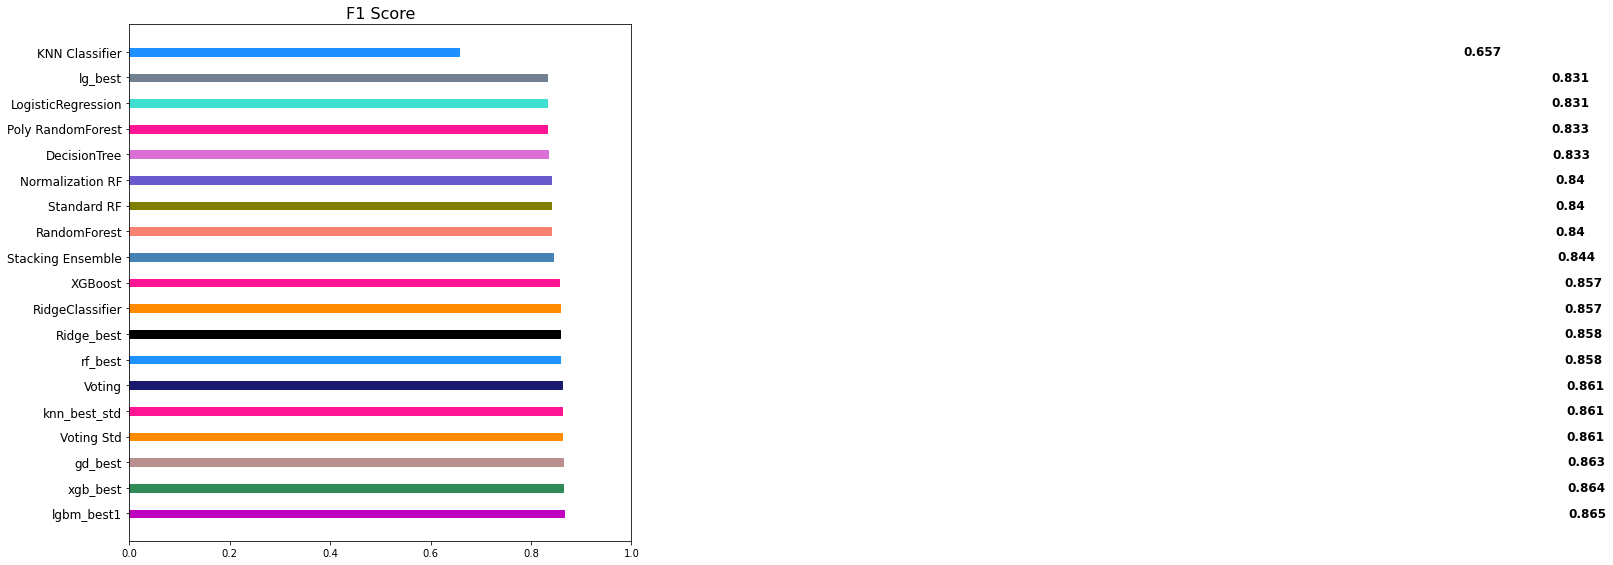

In [35]:
rf_best.fit(X_train, y_train)
rf_best_pred = rf_best.predict(X_test)
f1_eval('rf_best', rf_best_pred, y_test)

In [36]:
models = [
    # ('Logi', lg_best), 
    # ('ridge', Ridge_best),
    ('knn', knn_best),
    # ('rf', rf_best),
    ('lgbm', lgbm_best),
    ('xgb', xgb_best),
    ('gradient', gd_best)
]

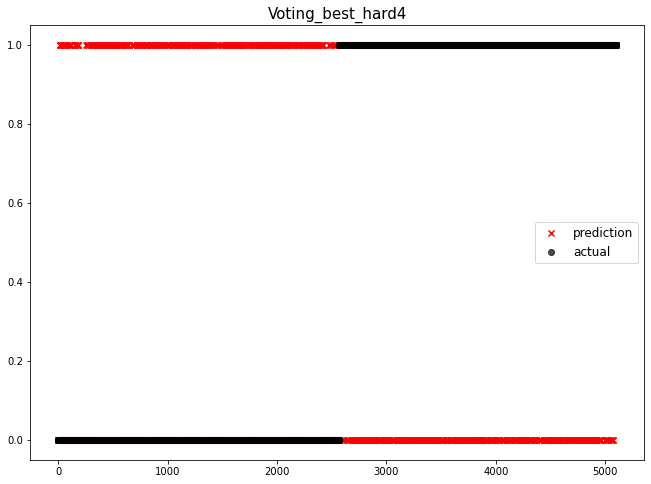

                 model        f1
0           lgbm_best1  0.865142
1             xgb_best  0.864032
2              gd_best  0.863394
3           Voting Std  0.861166
4         knn_best_std  0.861166
5               Voting  0.861100
6    Voting_best_hard4  0.861033
7              rf_best  0.858496
8           Ridge_best  0.857551
9      RidgeClassifier  0.857492
10             XGBoost  0.856804
11   Stacking Ensemble  0.843855
12        RandomForest  0.840293
13         Standard RF  0.840293
14    Normalization RF  0.840293
15        DecisionTree  0.833029
16   Poly RandomForest  0.832511
17  LogisticRegression  0.831072
18             lg_best  0.831072
19      KNN Classifier  0.657422


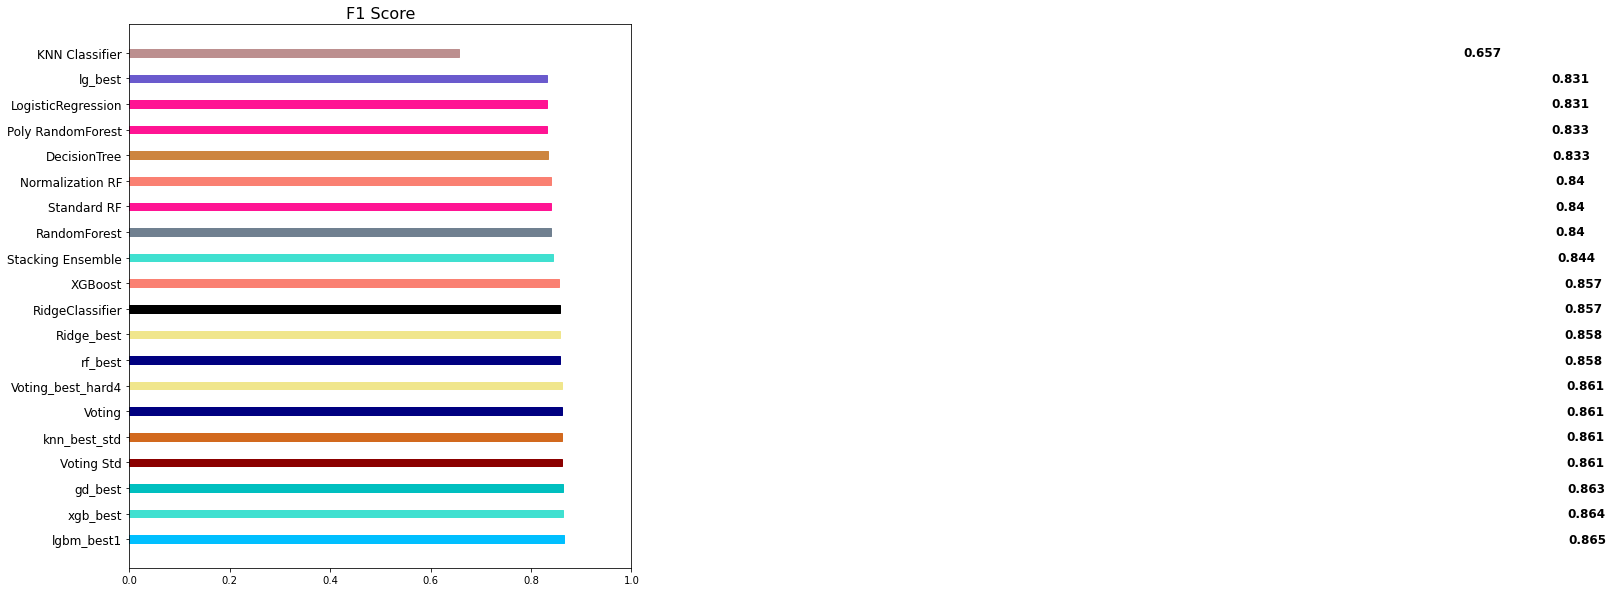

In [37]:
vc = VotingClassifier(models, voting='hard', n_jobs=-1)
vc.fit(X_train, y_train)
pred = vc.predict(X_test)
f1_eval('Voting_best_hard4', pred, y_test)

### **Stacking 결과**

In [38]:
from sklearn.ensemble import StackingClassifier

stack_models = [
    ('lgbm_std', lgbm_best), 
    ('knn_std', knn_best),
    # ('rf_bset', rf_best),
    ('Ridge', Ridge_best)
]

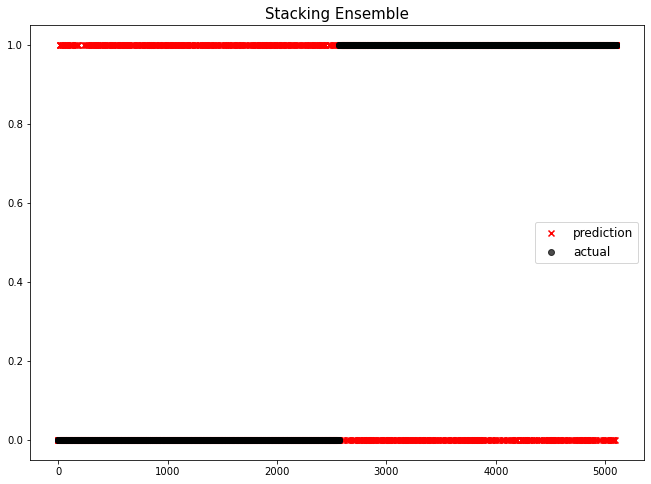

                 model        f1
0           lgbm_best1  0.865142
1             xgb_best  0.864032
2              gd_best  0.863394
3    Stacking Ensemble  0.862083
4           Voting Std  0.861166
5         knn_best_std  0.861166
6               Voting  0.861100
7    Voting_best_hard4  0.861033
8              rf_best  0.858496
9           Ridge_best  0.857551
10     RidgeClassifier  0.857492
11             XGBoost  0.856804
12        RandomForest  0.840293
13         Standard RF  0.840293
14    Normalization RF  0.840293
15        DecisionTree  0.833029
16   Poly RandomForest  0.832511
17  LogisticRegression  0.831072
18             lg_best  0.831072
19      KNN Classifier  0.657422


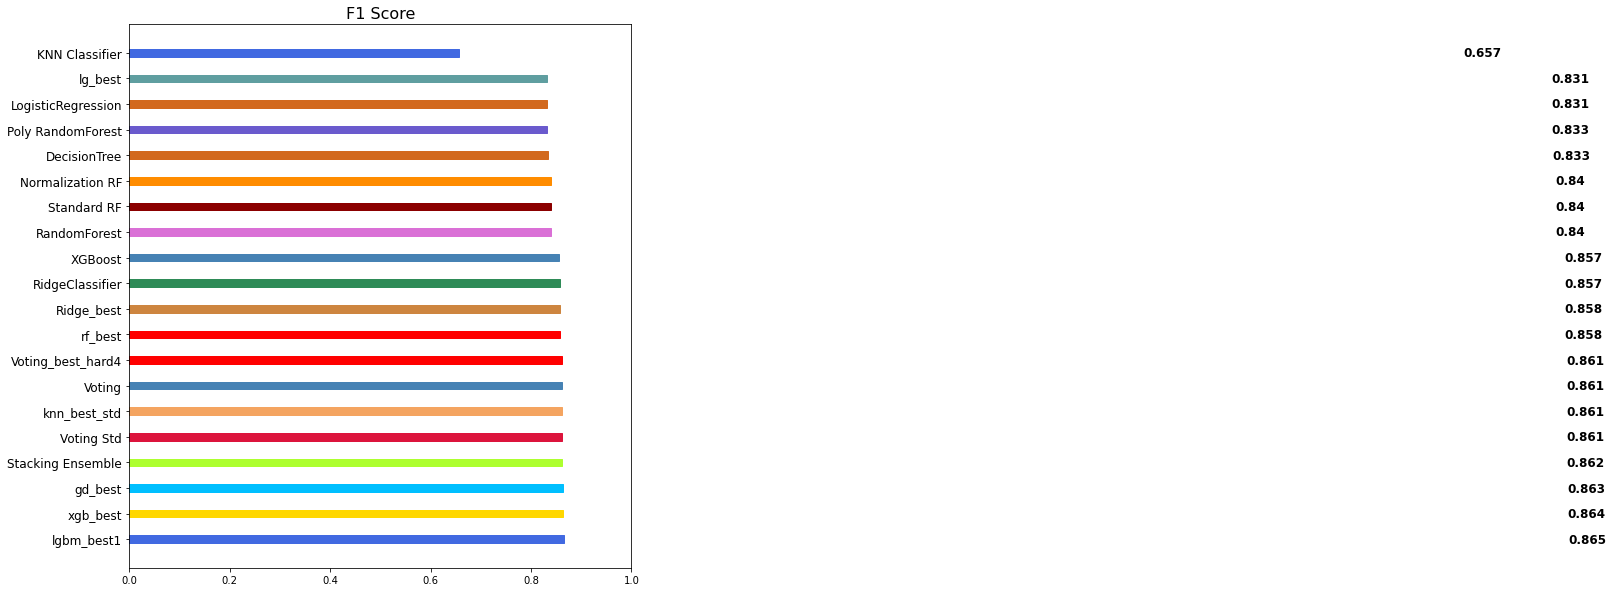

In [39]:
stack_cls = StackingClassifier(stack_models, final_estimator=xgb_best, n_jobs=-1)

# 알고리즘 3개만 사용
stack_cls.fit(X_train, y_train)
stack_pred = stack_cls.predict(X_test)
f1_eval('Stacking Ensemble', stack_pred, y_test)

In [40]:
final_outputs = {
    'xgb_best': xgb_best_pred, 
    'lgbm_std': lgbm_best_pred, 
    'knn_std': knn_best_pred,
    'rf_best': rf_best_pred, 
    'Ridge': Ridge_best_pred,
    'gdb': gd_best_pred,
}

In [41]:
final_prediction=\
final_outputs['Ridge'] * 0.1\
+final_outputs['knn_std'] * 0.2\
+final_outputs['lgbm_std'] * 0.2\
+final_outputs['xgb_best'] * 0.25\
+final_outputs['rf_best'] * 0.15\
+final_outputs['gdb'] * 0.1

In [42]:
# Confusion Matrix로 보여주기
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from IPython.display import Image

my_predictions = {}
my_pred = None
my_actual = None
my_name = None

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(11, 8))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    
plt.show
()

def plot_confusionmatrix(name_, actual,pred):
    cm = confusion_matrix(actual, pred)
    cm = pd.DataFrame(cm, columns=['Lose','Win'], index=['Lose','Win'])# columns=['Lose','Win'], index=['Lose','Win']
    plt.figure(figsize=(11,8))
    sns.heatmap(cm, annot=True, annot_kws={'size':20}, cmap='YlOrBr')
    plt.xlabel('Predict', fontsize=20)
    plt.ylabel('Actual', fontsize=20)
    
    plt.show()
    print(cm)

def f1_eval(name_, pred, actual):

    global my_predictions, colors, my_pred, my_actual, my_name
    
    my_name = name_
    my_pred = pred
    my_actual = actual
    plot_confusionmatrix(name_, pred, actual)
#    plot_predictions(name_, pred, actual)

    f1 = f1_score(actual, pred)
    my_predictions[name_] = f1

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'f1'])
    print(df)
    min_ = 0
    max_ = 1
    
    length = len(df) / 2



    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['f1'], height=0.3)
    
    for i, v in enumerate(df['f1']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('F1 Score', fontsize=16)
    plt.xlim(min_, max_)
    
    
plt.show
()
    
def add_model(name_, pred, actual):
    global my_predictions, my_pred, my_actual, my_name
    my_name = name_
    my_pred = pred
    my_actual = actual
    
    f1 = f1_score(actual, pred)
    my_predictions[name_] = f1

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

def plot_all():
    global my_predictions, my_pred, my_actual, my_name
    
    plot_predictions(my_name, my_pred, my_actual)
    
    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'f1'])
    print(df)
    min_ = 0
    max_ = 1
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['f1'], height=0.3)
    
    for i, v in enumerate(df['f1']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('F1 Score', fontsize=16)
    plt.xlim(min_, max_)
    
    
plt.show
() 

()

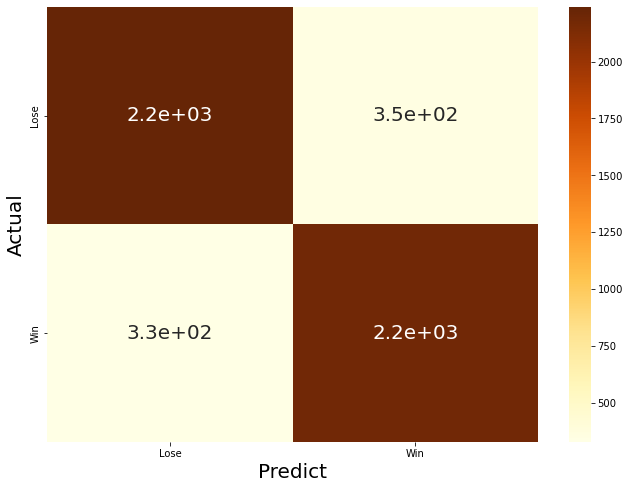

      Lose   Win
Lose  2240   350
Win    328  2182
               model       f1
0  Weighted Blending  0.86553


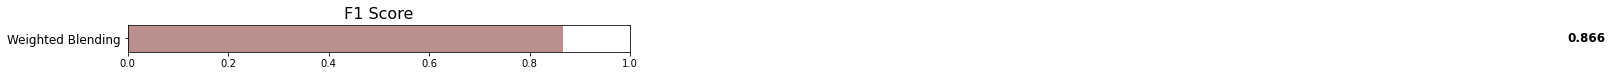

In [43]:
# Weighted Blending score
f1_eval('Weighted Blending', (final_prediction>0.5)+0, y_test)

In [18]:
import shap
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
#matplotlib 패키지 한글 깨짐 처리 끝

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


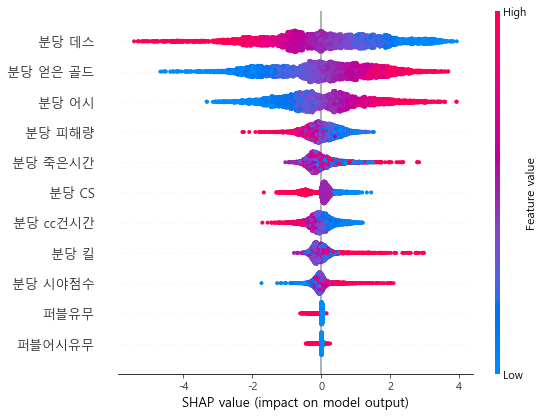

In [19]:
shap.initjs()
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)
fig = shap.summary_plot(shap_values, X_test)
#plt.savefig(f'{data}/shap.png', dpi=300, bbox_inches="tight")

In [50]:
shap.initjs()
explainer = shap.TreeExplainer(lgbm_best)
shap_values = explainer.shap_values(X_test)

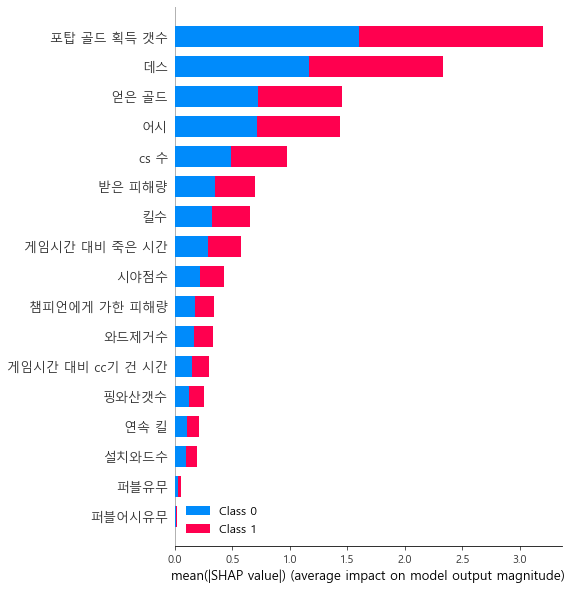

In [55]:
shap.summary_plot(shap_values, X_test, max_display=X_test.shape[1])